In [1]:
import pandas as pd
import librosa 
import os
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Reshape,MaxPooling2D, GlobalAveragePooling2D, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import StratifiedKFold

In [2]:
df= pd.read_csv("D:\DeepFake\KAGGLE\\train.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\xsunt\AppData\Local\Temp\ipykernel_15004\1508468371.py:1: SyntaxWarning: invalid escape sequence '\D'
  df= pd.read_csv("D:\DeepFake\KAGGLE\\train.csv")


,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE


In [3]:
def label_encoder(col):
    le = LabelEncoder().fit(col)
    print(col.name, le.classes_)
    return le.transform(col)

In [4]:
df['transformed_label']= label_encoder(df['LABEL'])
df['transformed_label'].unique()

LABEL ['FAKE' 'REAL']


array([0, 1])

In [5]:
X = df.drop(['LABEL','transformed_label'], axis=1)
X = np.array(X)
X =X.reshape(X.shape[0], X.shape[1], 1 )

In [6]:
X = df.drop(['LABEL','transformed_label'], axis=1)
y = df['transformed_label']

In [7]:
X = np.array(X)

In [8]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(9422, 26, 1)

In [124]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras import optimizers

# # Define the model architecture
# model = Sequential([
#     Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2])),
#     MaxPooling1D(pool_size=2),
#     LSTM(64, return_sequences=True),
#     LSTM(64),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# optimizer = optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
# model.summary()

# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model
# history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# # Save the model
# model.save("cnn_lstm.h5")

# # Print the keys in the history object
# print(history.history.keys())

# # Plotting accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# # Plotting loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


In [11]:
X.shape[1]

26

In [12]:
X.shape[2]

1

Fold 1/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.7014 - loss: 0.5632 - val_accuracy: 0.9066 - val_loss: 0.2414
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8880 - loss: 0.2901 - val_accuracy: 0.9147 - val_loss: 0.2119
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9321 - loss: 0.1939 - val_accuracy: 0.9580 - val_loss: 0.1124
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9578 - loss: 0.1211 - val_accuracy: 0.9317 - val_loss: 0.1952
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9614 - loss: 0.1231 - val_accuracy: 0.9699 - val_loss: 0.0814
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.9726 - loss: 0.0816 - val_accuracy: 0.9686 - val_loss: 0.0820
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9769 - loss: 0.0668 - val_accuracy: 0.9648 - val_loss: 0.0987
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9804 - loss: 0.0663 - va

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9708 - loss: 0.0934
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step


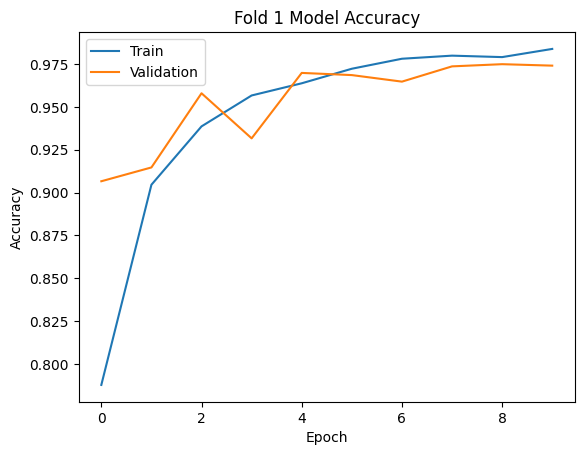

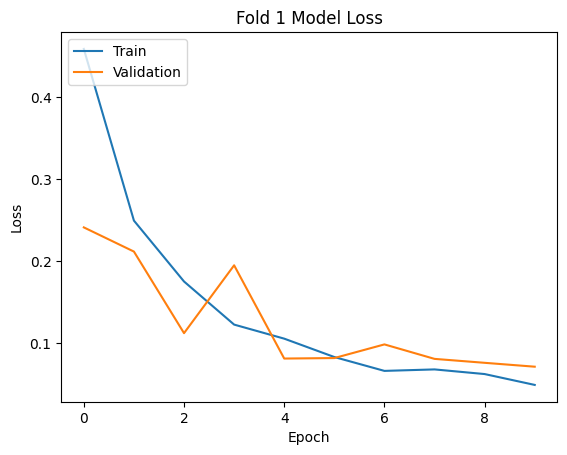

Fold 2/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.7263 - loss: 0.5366 - val_accuracy: 0.8782 - val_loss: 0.3180
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9021 - loss: 0.2654 - val_accuracy: 0.8463 - val_loss: 0.3062
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9389 - loss: 0.1660 - val_accuracy: 0.9597 - val_loss: 0.1154
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9574 - loss: 0.1255 - val_accuracy: 0.9622 - val_loss: 0.0964
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9688 - loss: 0.0893 - val_accuracy: 0.9694 - val_loss: 0.0771
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9751 - loss: 0.0748 - val_accuracy: 0.9626 - val_loss: 0.1016
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9674 - loss: 0.0943 - val_accuracy: 0.9610 - val_loss: 0.1036
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9765 - loss: 0.0713 - val_acc

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9635 - loss: 0.0809
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


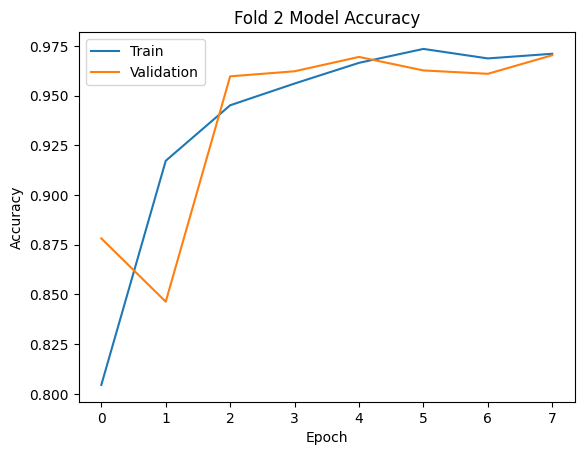

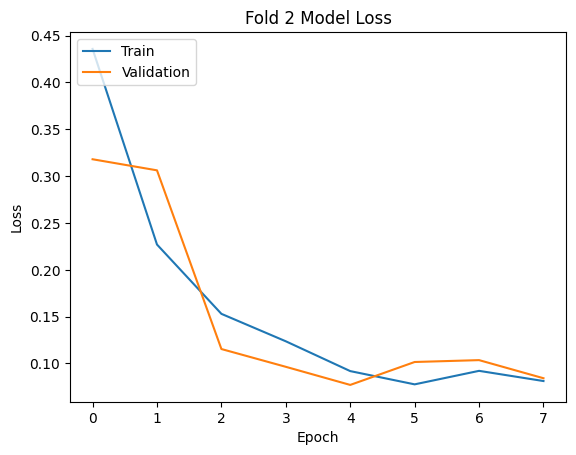

Fold 3/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7242 - loss: 0.5406 - val_accuracy: 0.8875 - val_loss: 0.2927
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9025 - loss: 0.2653 - val_accuracy: 0.9351 - val_loss: 0.1786
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9367 - loss: 0.1730 - val_accuracy: 0.9444 - val_loss: 0.1458
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9546 - loss: 0.1270 - val_accuracy: 0.9665 - val_loss: 0.0870
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9625 - loss: 0.1072 - val_accuracy: 0.9711 - val_loss: 0.0805
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9722 - loss: 0.0834 - val_accuracy: 0.9550 - val_loss: 0.1314
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9716 - loss: 0.0847 - val_accuracy: 0.9737 - val_loss: 0.0755
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9758 - loss: 0.0682 - val_ac

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9730 - loss: 0.0690
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


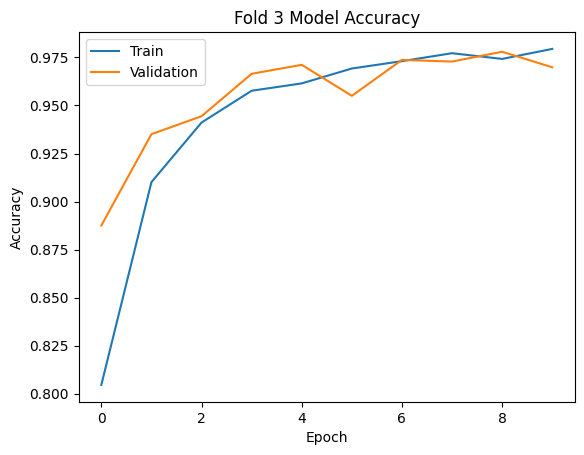

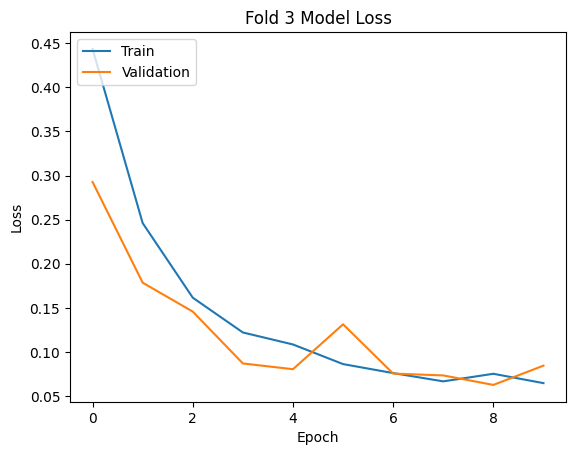

Fold 4/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7099 - loss: 0.5530 - val_accuracy: 0.8718 - val_loss: 0.2925
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8840 - loss: 0.2926 - val_accuracy: 0.9380 - val_loss: 0.1658
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9315 - loss: 0.1884 - val_accuracy: 0.9520 - val_loss: 0.1259
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9583 - loss: 0.1256 - val_accuracy: 0.9558 - val_loss: 0.1165
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9639 - loss: 0.1032 - val_accuracy: 0.9660 - val_loss: 0.0856
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9725 - loss: 0.0839 - val_accuracy: 0.9694 - val_loss: 0.0790
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9762 - loss: 0.0734 - val_accuracy: 0.9673 - val_loss: 0.0877
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9743 - loss: 0.0789 - val_acc

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9695 - loss: 0.0990
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


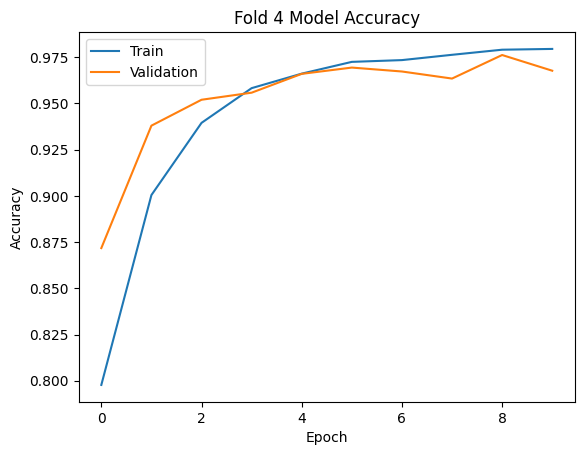

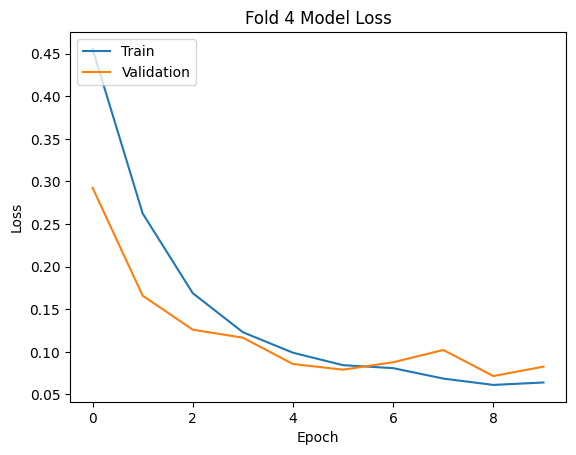

Fold 5/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.6857 - loss: 0.5748 - val_accuracy: 0.8471 - val_loss: 0.3547
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8909 - loss: 0.2920 - val_accuracy: 0.9495 - val_loss: 0.1401
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9406 - loss: 0.1723 - val_accuracy: 0.9618 - val_loss: 0.0998
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9541 - loss: 0.1311 - val_accuracy: 0.9677 - val_loss: 0.0845
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9696 - loss: 0.0871 - val_accuracy: 0.9660 - val_loss: 0.0945
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9691 - loss: 0.0934 - val_accuracy: 0.9817 - val_loss: 0.0585
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9752 - loss: 0.0748 - val_accuracy: 0.9686 - val_loss: 0.1165
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9774 - loss: 0.0680 - val_ac

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9830 - loss: 0.0474
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


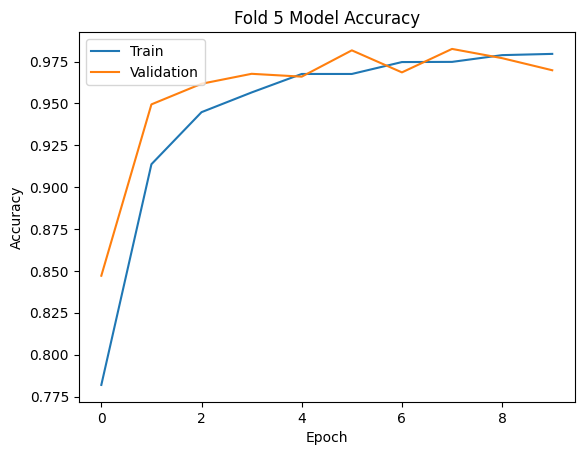

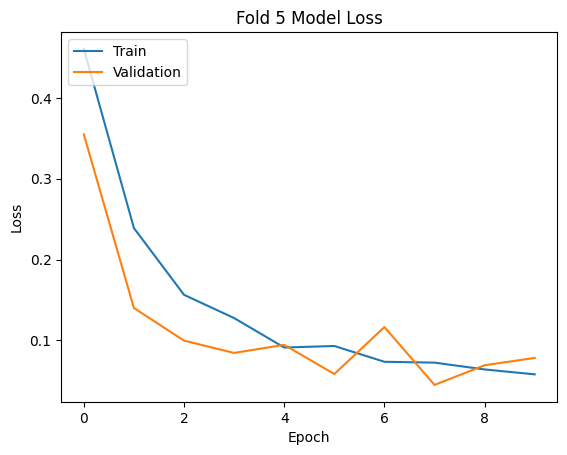

Average Accuracy: 0.9760576248168945, Standard Deviation: 0.004331229031438176
Average Confusion Matrix:
[[1144.    33.8]
 [  22.6 1155.2]]


In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import optimizers

# Assuming X and y are already defined and preprocessed

# Define the model architecture
def create_model():
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(X.shape[1], X.shape[2])),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
    return model

# Initialize variables for k-fold cross validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracy = []
fold_conf_matrices = []

# Perform k-fold cross validation
for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}/{num_folds}")
    
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Create the model
    model = create_model()
    
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model
    history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])
    # Save the model
    # model.save(f"cnn_lstm_fold_{fold+1}.h5")
    # Evaluate the model on validation data
    _, accuracy = model.evaluate(X_val, y_val)
    fold_accuracy.append(accuracy)
    
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5).astype(int)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    fold_conf_matrices.append(conf_matrix)
    
    # Plotting accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Fold {fold+1} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plotting loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Fold {fold+1} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Calculate average accuracy and confusion matrix
avg_accuracy = np.mean(fold_accuracy)
std_accuracy = np.std(fold_accuracy)
print(f"Average Accuracy: {avg_accuracy}, Standard Deviation: {std_accuracy}")

avg_conf_matrix = np.mean(fold_conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_conf_matrix)


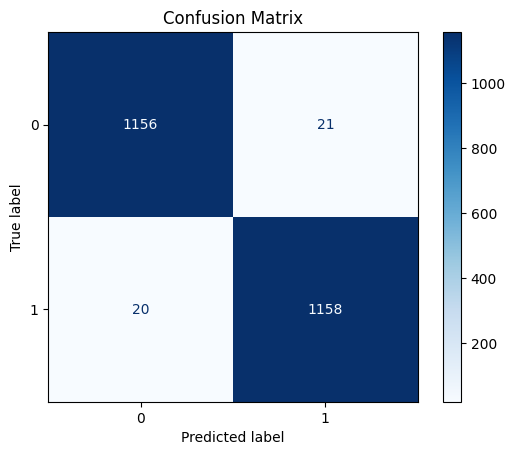

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true và y_pred là nhãn thực tế và nhãn dự đoán tương ứng
# Đảm bảo rằng y_true và y_pred là các mảng NumPy hoặc danh sách

# Tính toán confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Tạo hiển thị confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Vẽ confusion matrix
disp.plot(cmap=plt.cm.Blues)

# Hiển thị confusion matrix
plt.title('Confusion Matrix')
plt.show()


In [127]:
real_path = 'D:\DeepFake\DEMONSTRATION\DEMONSTRATION\linus-original-DEMO.mp3'
fake_path = 'D:\DeepFake\DEMONSTRATION\DEMONSTRATION\linus-to-musk-DEMO.mp3'


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\xsunt\AppData\Local\Temp\ipykernel_24440\528069393.py:1: SyntaxWarning: invalid escape sequence '\D'
  real_path = 'D:\DeepFake\DEMONSTRATION\DEMONSTRATION\linus-original-DEMO.mp3'
C:\Users\xsunt\AppData\Local\Temp\ipykernel_24440\528069393.py:2: SyntaxWarning: invalid escape sequence '\D'
  fake_path = 'D:\DeepFake\DEMONSTRATION\DEMONSTRATION\linus-to-musk-DEMO.mp3'


In [128]:
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    rms = librosa.feature.rms(y=y).mean()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs = [mfcc[i].mean() for i in range(20)]
    
    features = {
        'chroma_stft': chroma_stft,
        'rms': rms,
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'rolloff': rolloff,
        'zero_crossing_rate': zero_crossing_rate,
        'mfcc1': mfccs[0],
        'mfcc2': mfccs[1],
        'mfcc3': mfccs[2],
        'mfcc4': mfccs[3],
        'mfcc5': mfccs[4],
        'mfcc6': mfccs[5],
        'mfcc7': mfccs[6],
        'mfcc8': mfccs[7],
        'mfcc9': mfccs[8],
        'mfcc10': mfccs[9],
        'mfcc11': mfccs[10],
        'mfcc12': mfccs[11],
        'mfcc13': mfccs[12],
        'mfcc14': mfccs[13],
        'mfcc15': mfccs[14],
        'mfcc16': mfccs[15],
        'mfcc17': mfccs[16],
        'mfcc18': mfccs[17],
        'mfcc19': mfccs[18],
        'mfcc20': mfccs[19],
    }
    return features

In [139]:
trump_path = "D:\\DeepFake\\KAGGLE\\AUDIO\\REAL\\trump-original.wav"
margot_trump_path = "D:\DeepFake\KAGGLE\AUDIO\FAKE\margot-to-trump.wav"

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\xsunt\AppData\Local\Temp\ipykernel_24440\424020224.py:2: SyntaxWarning: invalid escape sequence '\D'
  margot_trump_path = "D:\DeepFake\KAGGLE\AUDIO\FAKE\margot-to-trump.wav"


In [140]:
ft_margot_trump = pd.DataFrame([extract_features(margot_trump_path)])

In [135]:
ft_trump = pd.DataFrame([extract_features(trump_path)])

In [141]:
ft_margot_trump =np.expand_dims(ft_margot_trump, axis=-1)

In [137]:
ft_trump= np.expand_dims(ft_trump, axis=-1)

In [129]:
ft_real = pd.DataFrame([extract_features(real_path)])
ft_fake = pd.DataFrame([extract_features(fake_path)])

In [130]:
ft_real = np.expand_dims(ft_real, axis=-1)  # Chuyển từ (1, 26) sang (1, 26, 1)


In [131]:
ft_fake = np.expand_dims(ft_fake, axis=-1)

In [133]:
print(model.predict(ft_real))
print(model.predict(ft_fake))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[0.00708188]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[5.6565266e-05]]


In [142]:
print(model.predict(ft_trump))
print(model.predict(ft_margot_trump))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
[[0.00039907]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
[[0.01254901]]


Fold 1/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7515 - loss: 0.5201 - val_accuracy: 0.8748 - val_loss: 0.2803
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8855 - loss: 0.2795 - val_accuracy: 0.9270 - val_loss: 0.2126
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9315 - loss: 0.1762 - val_accuracy: 0.9554 - val_loss: 0.1347
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9546 - loss: 0.1338 - val_accuracy: 0.9614 - val_loss: 0.1074
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9630 - loss: 0.1014 - val_accuracy: 0.9694 - val_loss: 0.0918
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9661 - loss: 0.1014 - val_accuracy: 0.9673 - val_loss: 0.1032
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9696 - loss: 0.0820 - val_accuracy: 0.9512 - val_loss: 0.1299
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9711 - loss: 0.0837 - 

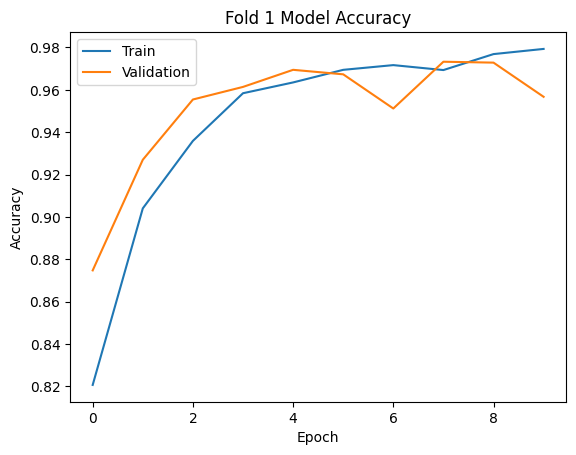

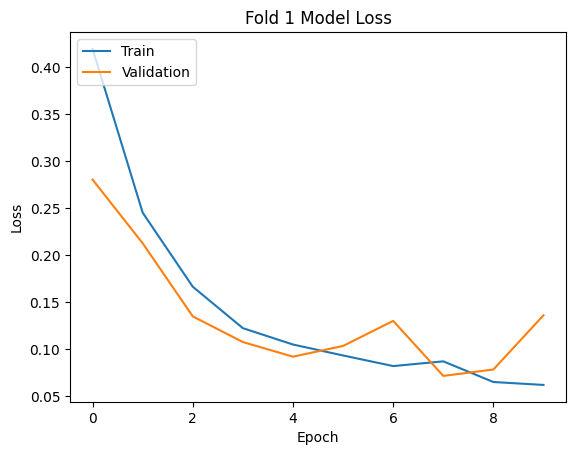

Fold 2/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7257 - loss: 0.5395 - val_accuracy: 0.8909 - val_loss: 0.2579
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9022 - loss: 0.2532 - val_accuracy: 0.9181 - val_loss: 0.1869
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9326 - loss: 0.1770 - val_accuracy: 0.9478 - val_loss: 0.1337
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9430 - loss: 0.1472 - val_accuracy: 0.9588 - val_loss: 0.1101
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9617 - loss: 0.1125 - val_accuracy: 0.9486 - val_loss: 0.1297
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9669 - loss: 0.0973 - val_accuracy: 0.9707 - val_loss: 0.0832
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9685 - loss: 0.0858 - val_accuracy: 0.9745 - val_loss: 0.0718
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9744 - loss: 0.0746 - val_

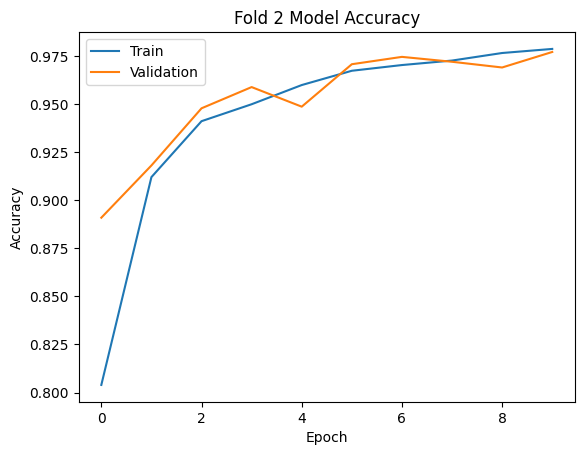

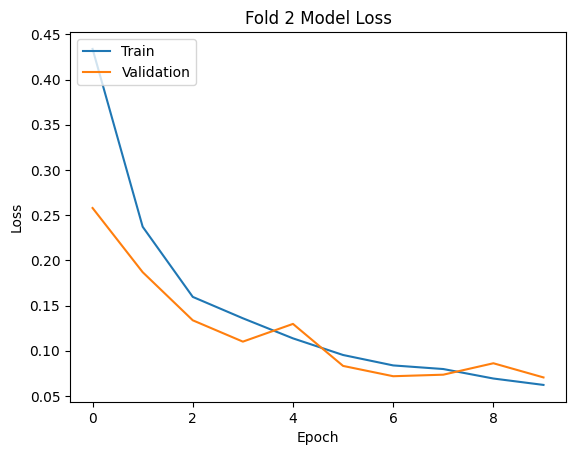

Fold 3/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.7178 - loss: 0.5558 - val_accuracy: 0.8905 - val_loss: 0.2871
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8920 - loss: 0.2734 - val_accuracy: 0.9372 - val_loss: 0.1653
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9359 - loss: 0.1909 - val_accuracy: 0.9393 - val_loss: 0.1619
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9581 - loss: 0.1240 - val_accuracy: 0.9711 - val_loss: 0.0901
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9616 - loss: 0.0966 - val_accuracy: 0.9465 - val_loss: 0.1522
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9602 - loss: 0.1116 - val_accuracy: 0.9618 - val_loss: 0.1036
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9694 - loss: 0.0859 - val_accuracy: 0.9737 - val_loss: 0.0700
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9774 - loss: 0.0670 - val_ac

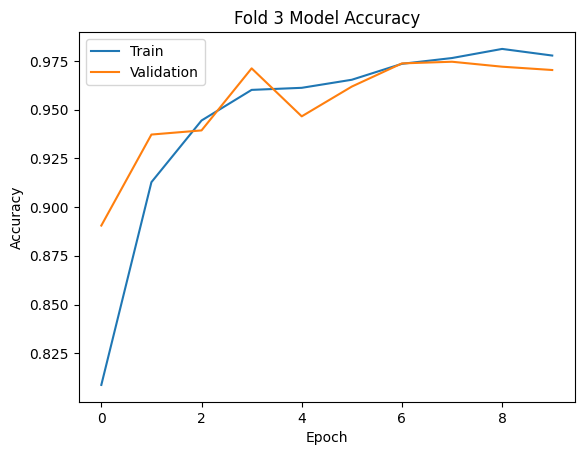

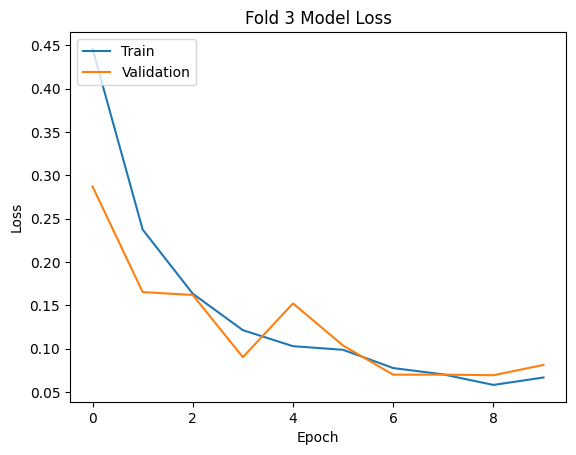

Fold 4/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.7253 - loss: 0.5458 - val_accuracy: 0.8577 - val_loss: 0.3262
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8839 - loss: 0.2879 - val_accuracy: 0.9163 - val_loss: 0.2084
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9257 - loss: 0.1963 - val_accuracy: 0.9439 - val_loss: 0.1479
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9543 - loss: 0.1275 - val_accuracy: 0.9393 - val_loss: 0.1565
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9608 - loss: 0.1127 - val_accuracy: 0.9711 - val_loss: 0.0747
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9740 - loss: 0.0759 - val_accuracy: 0.9588 - val_loss: 0.1030
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9732 - loss: 0.0789 - val_accuracy: 0.9639 - val_loss: 0.0935
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9715 - loss: 0.0787 - val_ac

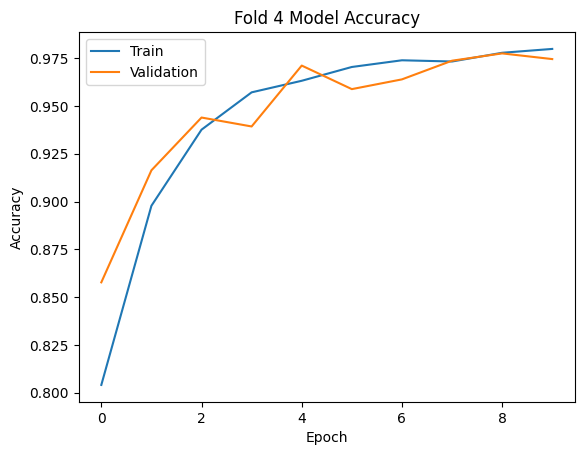

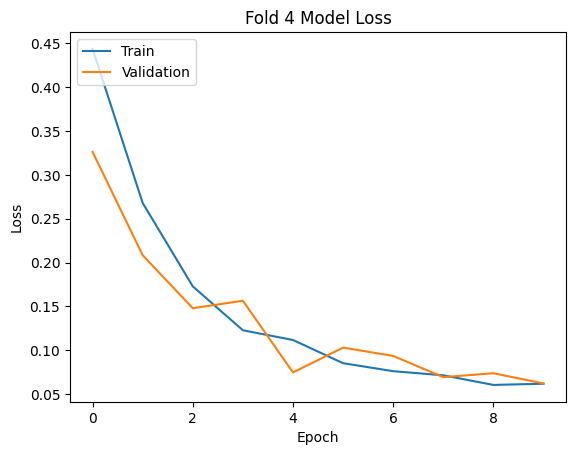

Fold 5/5


c:\Users\xsunt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.7281 - loss: 0.5374 - val_accuracy: 0.8577 - val_loss: 0.3232
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9027 - loss: 0.2550 - val_accuracy: 0.9261 - val_loss: 0.1980
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.9381 - loss: 0.1622 - val_accuracy: 0.9656 - val_loss: 0.0969
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.9561 - loss: 0.1198 - val_accuracy: 0.9605 - val_loss: 0.1046
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.9675 - loss: 0.0965 - val_accuracy: 0.9728 - val_loss: 0.0711
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9681 - loss: 0.0867 - val_accuracy: 0.9796 - val_loss: 0.0642
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9769 - loss: 0.0671 - val_accuracy: 0.9788 - val_loss: 0.0590
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9811 - loss: 0.0536 - 

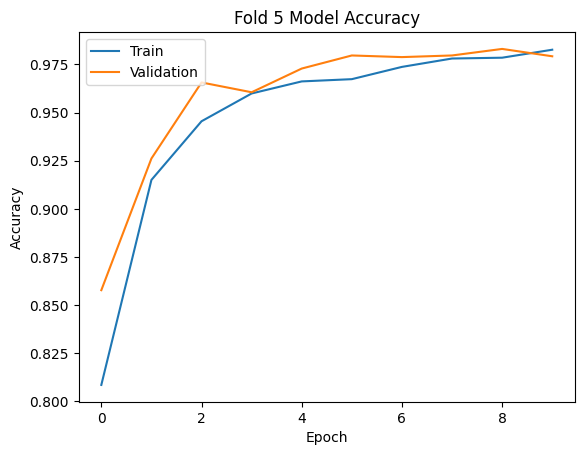

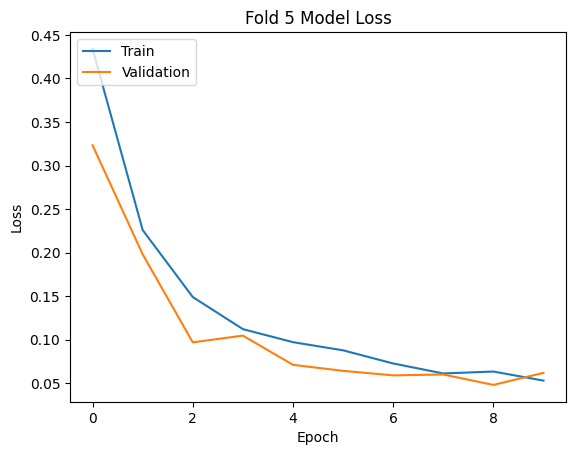

Average Accuracy: 0.9759726285934448, Standard Deviation: 0.0039031344060200686
Average Confusion Matrix:
[[1147.6   30.2]
 [  26.4 1151.4]]


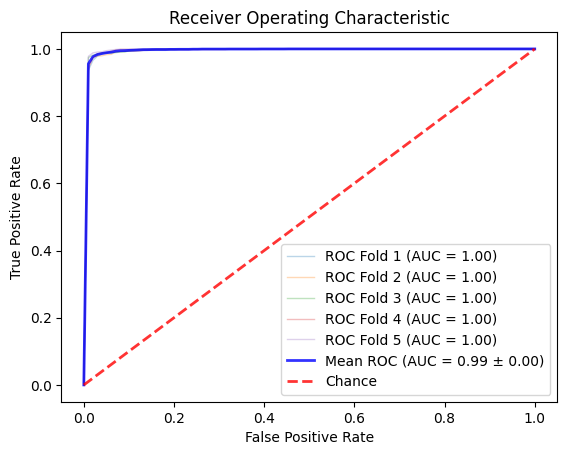

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import optimizers

# Assuming X and y are already defined and preprocessed

# Define the model architecture
def create_model():
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(X.shape[1], X.shape[2])),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
    return model

# Initialize variables for k-fold cross validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracy = []
fold_conf_matrices = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform k-fold cross validation
for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}/{num_folds}")
    
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Create the model
    model = create_model()
    
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model
    history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # # Save the model
    # model.save(f"cnn_lstm_fold_{fold+1}.h5")
    
    # Evaluate the model on validation data
    _, accuracy = model.evaluate(X_val, y_val)
    fold_accuracy.append(accuracy)
    
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred_binary)
    fold_conf_matrices.append(conf_matrix)
    
    # Plotting accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Fold {fold+1} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plotting loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Fold {fold+1} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Calculate average accuracy and confusion matrix
avg_accuracy = np.mean(fold_accuracy)
std_accuracy = np.std(fold_accuracy)
print(f"Average Accuracy: {avg_accuracy}, Standard Deviation: {std_accuracy}")

avg_conf_matrix = np.mean(fold_conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_conf_matrix)

# Plot ROC curve separately
plt.figure()
for i, tpr in enumerate(tprs):
    plt.plot(mean_fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {aucs[i]:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
